In [180]:
# Alif Firmansyah
# 1103204105
# TK44G4
# Lecture 2, 2 Maret 2024, Model : Logistic Regression, Dataset : Abalone age
# Dokumentasi ChatGPT : https://chat.openai.com/share/44037a72-0f66-4552-817c-d479f3542737

# 1. Memuat Library

In [181]:
# Impor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Memuat Data

In [182]:
# Baca dataset 
heart_data = pd.read_csv('/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 3. Pre-Processing

In [183]:
# Memisahkan fitur dan label
X = heart_data.drop(columns=['target'])
y = heart_data['target']

In [184]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Regresi

In [186]:
# Membuat model Regresi Logistik
model = LogisticRegression()

In [187]:
# Melatih model
model.fit(X_train, y_train)

LogisticRegression()

# 5. Evaluasi

In [188]:
# Memprediksi label untuk data uji
y_pred = model.predict(X_test)

In [189]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.8524590163934426

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Confusion Matrix:
 [[25  4]
 [ 5 27]]


# 6. Visualisasi

In [190]:
# Menggabungkan fitur dan label untuk visualisasi
heart_visual = heart_data.copy()

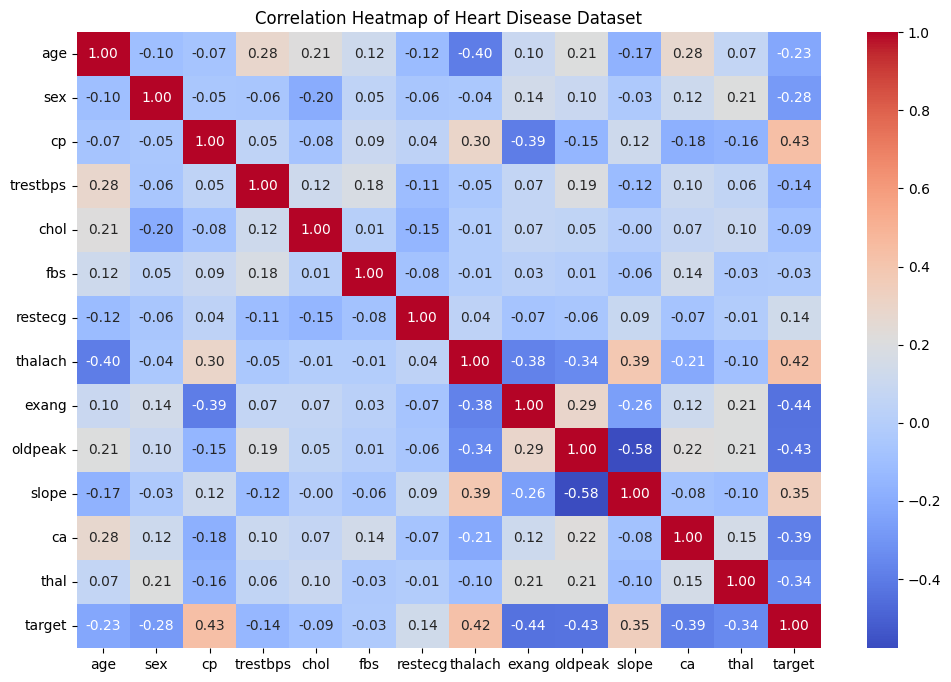

In [191]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(heart_visual.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

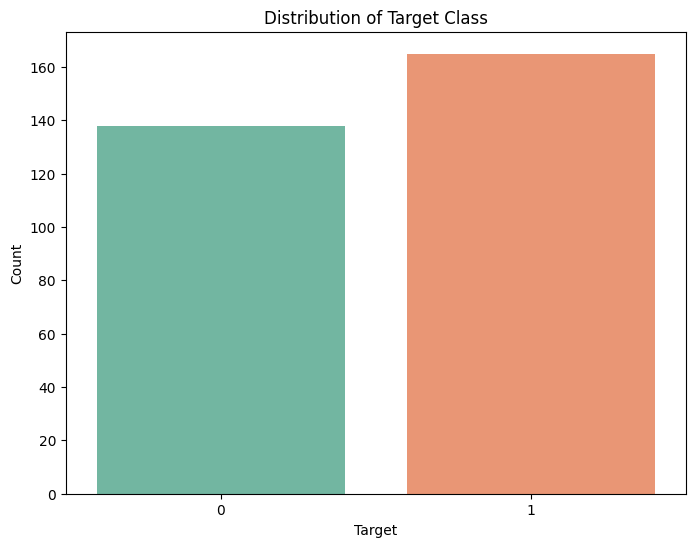

In [192]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=heart_visual, palette='Set2')
plt.title('Distribution of Target Class')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()